In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Packages**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# **Importing the Dataset**

In [3]:
## Using the base knowledge make a predition model without using a pipeline. ##
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.info()
# df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Tackling the null values Problem**

In [6]:
null_cols = df_train.isna().sum()
null_cols

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train = df_train.drop(columns='Cabin', axis=1)

In [8]:
df_train.Age.fillna(df_train.Age.mean(), inplace=True)

In [9]:
df_train.Embarked.fillna(df_train.Embarked.mode()[0], inplace=True)

In [10]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_test = df_test.drop(columns='Cabin', axis=1)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)
df_test.Fare.fillna(df_test.Fare.mean(), inplace=True)

In [13]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df_train.shape, df_test.shape

((891, 11), (418, 10))

# **Data Viz**

<AxesSubplot:xlabel='Age', ylabel='Fare'>

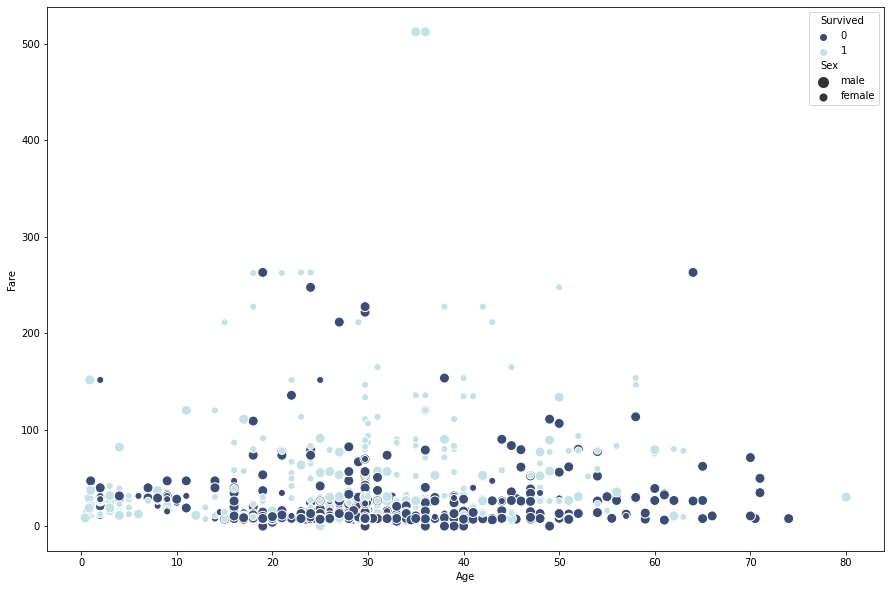

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="Age", y="Fare",
                hue="Survived", size="Sex",
                palette="ch:r=-.2,d=.3_r",
                sizes=(50, 100), linewidth=1,
                data=df_train, ax=ax)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

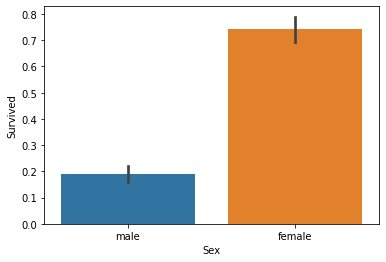

In [16]:
sns.barplot(x = 'Sex', y = 'Survived',data=df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


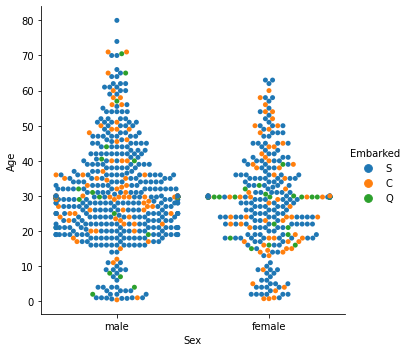

In [17]:
sns.catplot(x= 'Sex', y= 'Age', hue= 'Embarked', kind = 'swarm',data=df_train)

In [18]:
df_train2 = df_train.drop('Name', axis = 1)
df_train2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


# **PreProcessing**

In [19]:
s = (df_train2.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Ticket', 'Embarked']


In [20]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = df_train.index
OH_cols_test.index = df_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_df_train = df_train.drop(object_cols, axis=1)
num_df_test = df_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_df_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_df_test, OH_cols_test], axis=1)

# print("MAE from Approach 3 (One-Hot Encoding):") 
# print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

In [21]:
categorical_cols = [cname for cname in df_train2.columns if df_train2[cname].nunique() < 10 and 
                        df_train2[cname].dtype == "object"]

numerical_cols = [cname for cname in df_train2.columns if df_train2[cname].dtype in ['int64', 'float64']]

In [22]:
numerical_transformer = SimpleImputer(strategy ='constant')

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

my_cols = categorical_cols + numerical_cols
df_train2 = df_train2[my_cols].copy()
# df_test2 = df_test[my_cols].copy()

# **Model**

In [23]:
# model = RandomForestRegressor()
model = LinearRegression(n_jobs = 10)

pipeline_lr = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [24]:
## TO BE RESOLVED ''

# df_train2, df_test, y_train, y_test = train_test_split(X_train, y, 
#                                                        train_size=0.8, test_size=0.2, 
#                                                        random_state=0)

In [25]:
# pipeline_lr.fit()